<h1> Topic : Air-Sea Interactions and bulk formulae </h1>

# SETUP NOTEBOOK ENVIRONMENT

### Mount Google Drive

In [ ]:
# link to drive where datasets are stored
import os, sys
from google.colab import drive
drivedir='/content/drive'
drive.mount(drivedir)
os.chdir(drivedir)

Mounted at /content/drive


### Import Modules

In [ ]:
# install required modules I
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip install metpy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libproj-dev is already the newest version (8.2.1-1).
libproj-dev set to manually installed.
proj-data is already the newest version (8.2.1-1).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 154 kB of archives.
After this operation, 492 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 proj-bin amd64 8.2.1-1 [154 kB]
Fetched 154 kB in 9s (17.9 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 120880 files and directories currently installed.)
Preparing to unpack .../proj-bin_8.2.1-1_amd64.deb ...
Unpacking proj-bin (8.2.1-1) ...
Setting up proj-bin (8.2.1-1) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state informati

In [ ]:
# install required modules II
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.2
Uninstalling shapely-2.0.2:
  Successfully uninstalled shapely-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.7/279.7 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.0.2-cp310-cp310-linux_x86_64.whl size=1027135 sha256=0e6c5745db3bd5af3037185a58c4884fa5b67b489bb010ddb00fc9401b83e913
  Stored in directory: /root/.cache/pip/wheels/1f/6b/52/14cb4558cddc0fd89de08f0e1fd08f816f4f3e1969311377c6
Successfully built shapely
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
li

In [ ]:
! sudo apt-get install texlive-latex-recommended
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip
! unzip type1cm.zip -d /tmp/type1cm
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm
! sudo texhash
! apt install cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lmodern fonts-noto-mono fonts-urw-base35
  libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  libkpathsea6 libptexenc1 libsynctex2 libteckit0 libtexlua53 libtexluajit2
  libwoff1 libzzip-0-13 lmodern poppler-data t1utils tex-common texlive-base
  texlive-binaries texlive-latex-base xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  poppler-utils ghostscript fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum debhelper gv | postscript-viewer perl-tk xpdf
  | pdf-viewer xzdec texlive-latex-base-doc texlive-latex-recommended-doc
  texlive-luatex texlive-pstricks
The following NEW packages will be installed:
  dvisvgm fonts-droid-fa

In [ ]:
# import modules
import cartopy  #cartography library
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.dates import DateFormatter
from scipy import signal
import copy
from metpy.calc import specific_humidity_from_dewpoint, saturation_mixing_ratio
from metpy.units import units

### Load datasets

In [ ]:
datadir=drivedir+'/MyDrive/TASI_data_2023/'

In [ ]:
# 2D ERA5
dsERA5=xr.open_dataset(datadir+'/ERA5_2D_1958-2022_newg.nc')
dsERA5

<xarray.Dataset>
Dimensions:  (time: 780, lon: 192, lat: 145, expver: 2)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2022-12-01
  * lon      (lon) float64 -279.0 -277.1 -275.2 -273.4 ... 75.38 77.25 79.12
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * expver   (expver) int32 1 5
Data variables:
    u10      (time, lat, lon) float32 ...
    v10      (time, lat, lon) float32 ...
    t2m      (time, lat, lon) float32 ...
    msl      (time, lat, lon) float32 ...
    sst      (time, lat, lon) float32 ...
    tp       (time, lat, lon) float32 ...
    d2m      (time, expver, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.1.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Oct 30 23:50:02 2023: cdo merge ERA5_1958_2022_newg_old...
    CDO:          Climate Data Operators version 2.1.0 (https://mpimet.mpg.de...

In [ ]:
# 3D ERA5
dse3=xr.open_dataset(datadir+'/ERA5_3D_2012-2022_newg.nc')
dse3

<xarray.Dataset>
Dimensions:  (time: 132, lon: 192, lat: 145, level: 32)
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01 2012-02-01 ... 2022-12-01
  * lon      (lon) float64 -279.0 -277.1 -275.2 -273.4 ... 75.38 77.25 79.12
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * level    (level) float64 10.0 20.0 30.0 50.0 ... 925.0 950.0 975.0 1e+03
Data variables:
    q        (time, level, lat, lon) float32 ...
    t        (time, level, lat, lon) float32 ...
    u        (time, level, lat, lon) float32 ...
    v        (time, level, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Fri Oct  6 16:10:04 2023: ncrcat -O ERA5_UVTQ_2012_newg.nc ...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...
    NCO:          netCDF Operators version 4.8.1 (Homepage = http://nco.sf.ne...

In [ ]:
# ORAS5
dso=xr.open_dataset(datadir+'/ORAS5_1958-2022_newg.nc')
dso=dso.rename({'time_counter': 'time'}) #rename dimension time_counter so that it matches ERA5 name for time dimension

In [ ]:
dshlx = xr.open_dataset(datadir+'/ERA5_HFLX_1958-2022_newg.nc')
dshlx

<xarray.Dataset>
Dimensions:  (time: 780, lon: 192, lat: 145)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2022-12-01
  * lon      (lon) float64 -279.0 -277.1 -275.2 -273.4 ... 75.38 77.25 79.12
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
Data variables:
    slhf     (time, lat, lon) float32 ...
    ssr      (time, lat, lon) float32 ...
    str      (time, lat, lon) float32 ...
    sshf     (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Mon Oct 16 14:01:37 2023: cdo remapbil,newg.grd ERA5_NSR_NT...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

In [ ]:
lon = dsERA5.lon
lat = dsERA5.lat

# PART A: Bulk formulae for sea surface latent and sensible heat fluxes in the Tropics

## 1. Bulk formula reconstruction

In [ ]:
mask = dsERA5['sst']

sea_mask = np.isfinite(mask)
sea_mask = sea_mask.where(sea_mask, other=np.nan)

land_mask = np.isnan(mask)
land_mask = land_mask.where(land_mask, other=np.nan)

In [ ]:
# Monthly mean of sensible heat flux Qs:

rho = 1.5 # density of air [kg/m3]
Cp = 1030 # specific heat capacity of air [J/kg/K]
Cs = 1/1000 # sensible heat transfer coefficient

u = dsERA5.u10 # 10m u wind component
v = dsERA5.v10 # 10m v wind component
U10 = np.sqrt(u**2+v**2) # 10m wind speed (ie modulo) [m/s]

# Using 2D dataset for just sea
Ts = dsERA5['sst']  # sea surface temperature [K]
Ta = dsERA5['t2m']*sea_mask  # temperature at 2m (that should be at 10m) [K]

#slhf_rec
Qs = rho * Cp * Cs * U10 * (Ta-Ts) # kg/m3.J/kg/K.m/s.K = J/s/m2 = W/m2


# # Ploting an arbitrary month
# mese = 7
# fig, ax = plt.subplots(figsize=(12,6))
# cs = ax.contourf(lon,lat,Qs[mese])
# fig.colorbar(cs)
# X,Y = np.meshgrid(lon[::3],lat[::3])
# ax.quiver(X,Y,u[mese,::3,::3], v[mese,::3,::3], scale_units='xy', scale=1)

In [ ]:
# Monthly mean of latent heat flux Ql:

Le = 2.5e6 # latent heat of evaporation [J/kg]
Cl = 1.2e-3 # latent heat transfer coefficient

msp = dsERA5['msl']  # mean sea level pressure [Pa]
d2m = dsERA5['d2m'].sel(expver=1) # 2 meter dew point temperature [K]
t2m = dsERA5['t2m'] # 2 meter temperature [K]

qa = specific_humidity_from_dewpoint(msp.values*units.Pa, d2m.values*units.degK).to('kg/kg')
OME = saturation_mixing_ratio(msp.values*units.Pa, t2m.values*units.degK).to('kg/kg') #saturation mixing ratio ie mass of vapor / mass of dry air when air is saturated
qs = OME/(OME+1) #Specific humidity at saturation which in the ocean is the same as specific humidity at the sea surface

#sshf_rec
Ql = rho * Le * Cl * U10 * (qa-qs) * sea_mask # kg/m3.J/kg.m/s.kg/kg = J/m2/s = W/m2


# # Ploting an arbitrary month
# mese = 7
# fig, ax = plt.subplots(figsize=(12,6))
# cs = ax.contourf(lon,lat,Ql[mese])
# fig.colorbar(cs)
# X,Y = np.meshgrid(lon[::3],lat[::3])
# ax.quiver(X,Y,u[mese,::3,::3], v[mese,::3,::3], scale_units='xy', scale=1)

## 2. Assessment of the reconstruction in the Niño3.4 region

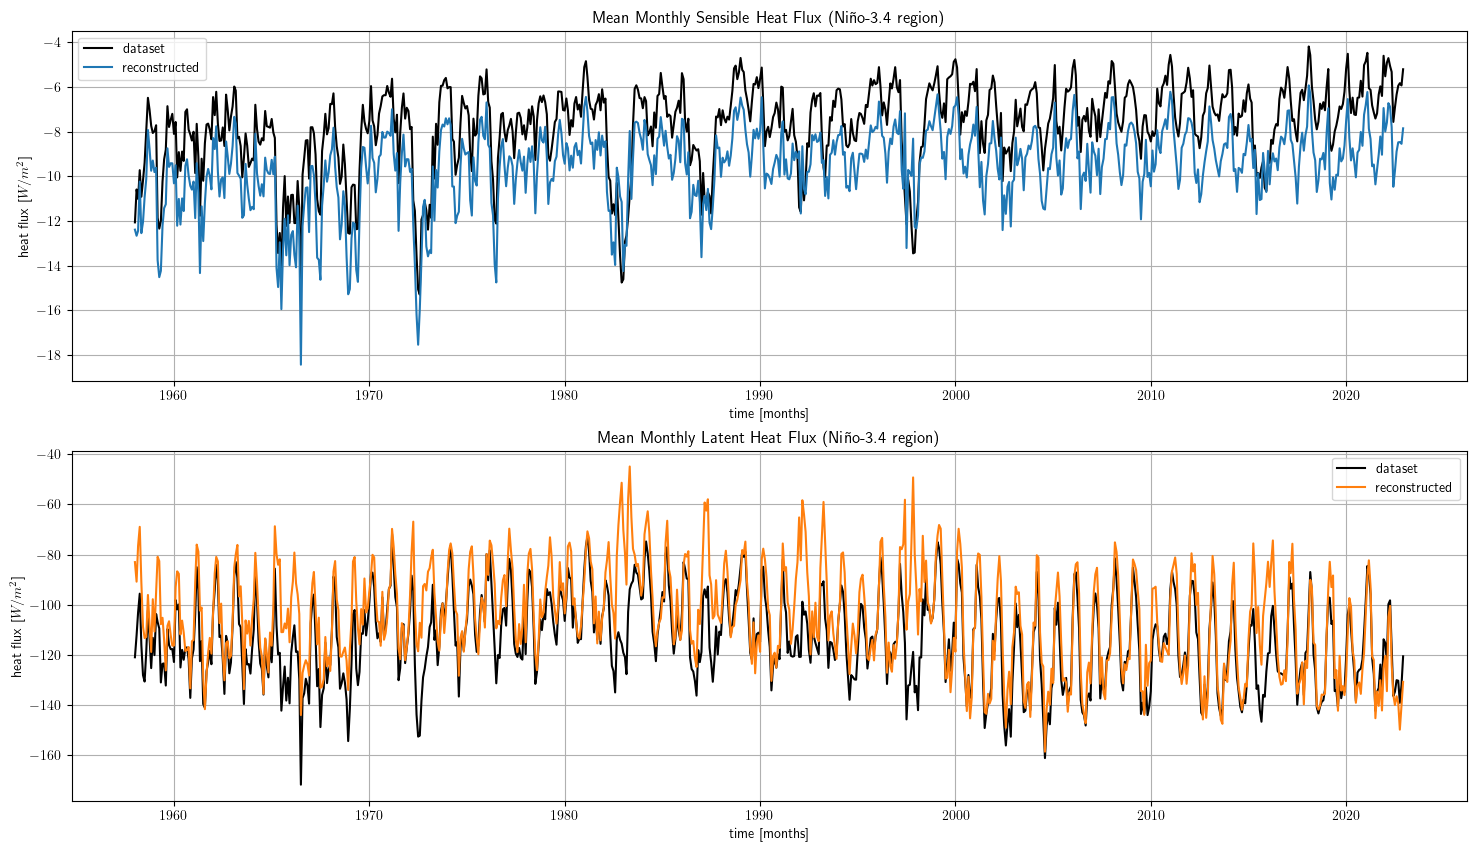

In [ ]:
# Qs and Ql timeseries from dataset (average daily accumulation in a month; negative means energy loss for the ocean)
sshf = dshlx.sshf.sel(lat=slice(-5,5)).sel(lon=slice(-170,-120)).mean(dim=('lon','lat'))/24/3600 #W/m2 in a day
slhf = dshlx.slhf.sel(lat=slice(-5,5)).sel(lon=slice(-170,-120)).mean(dim=('lon','lat'))/24/3600 #W/m2 in a day

# Qs and Ql timeseries reconstructed
Qs_t = Qs.sel(lat=slice(-5,5)).sel(lon=slice(-170,-120)).mean(dim=('lon','lat')) # time series for El Nino zone
Ql_t = Ql.sel(lat=slice(-5,5)).sel(lon=slice(-170,-120)).mean(dim=('lon','lat')) # time series for El Nino zone


list_flux = [sshf, slhf]
list_flux_rec = [Qs_t, Ql_t]

list_title = ["Mean Monthly Sensible Heat Flux (Niño-3.4 region)","Mean Monthly Latent Heat Flux (Niño-3.4 region)"]
list_colors = ['#1f77b4', '#ff7f0e']

fig, ax = plt.subplots(figsize=(18,10), nrows=2, ncols=1)

for i in range(2):

  ax[i].plot(sshf.time,list_flux[i], label = "dataset", color = 'k')
  ax[i].plot(sshf.time,list_flux_rec[i], label = "reconstructed", color = list_colors[i])
  ax[i].grid()
  ax[i].set_xlabel('time [months]')
  ax[i].set_ylabel('heat flux [$W/m^2$]')
  ax[i].set_title(list_title[i])
  ax[i].legend()

In [ ]:
print("Correlation coefficients between dataset and reconstructed data for :")
cor_s = np.corrcoef(sshf,Qs_t)[1,0]
print("- sensible heat flux : " ,cor_s)
cor_l = np.corrcoef(slhf,Ql_t)[1,0]
print("- latent heat flux : ", cor_l)

Correlation coefficients between dataset and reconstructed data for :
- sensible heat flux :  0.9093744049958734
- latent heat flux :  0.8267570689672353


The reconstructed values Qs and Ql follow rather closely the patterns of the original values, albeit for being slightly shifted to lower values for Qs (blue) and slightly higher values for Ql (orange). The high correlation coefficients indicate that the reconstruction is quite "good".

Improvement of reconstruction : for Qs taking t10m instead of t2m would probably cancel the observed shift. This also holds for Ql where we used t2m inside the saturation_mixing_ratio then composed with OME/(1+OME).

When estimating U10 I used the euclidean norm assuming that the lon-lat coordinate space were a plane. For small values this local approximation works fine but for greater values of wind components u and v where the change in latitude becomes significant perhaps for trade winds, then this doesn't yield a correct value of the wind speed.

The "good" reconstruction and high correlations might simply reflect the seasonality forced by the sun so let's look at the anomaly time series to check :

## 3. Reconstruction and seasonal cycle

In [ ]:
def anom(xarr):
  xarr_clm = xarr.groupby('time.month').mean('time')
  xarr_ano = xarr.groupby('time.month') - xarr_clm
  return xarr_ano

def anom_seas(xarr):
  xarr_clm = xarr.groupby('time.season').mean('time')
  xarr_ano = xarr.groupby('time.season') - xarr_clm
  return xarr_ano

In [ ]:
Qs_a = anom_seas(Qs_t)
Ql_a = anom_seas(Ql_t)
sshf_a = anom_seas(sshf)
slhf_a = anom_seas(slhf)

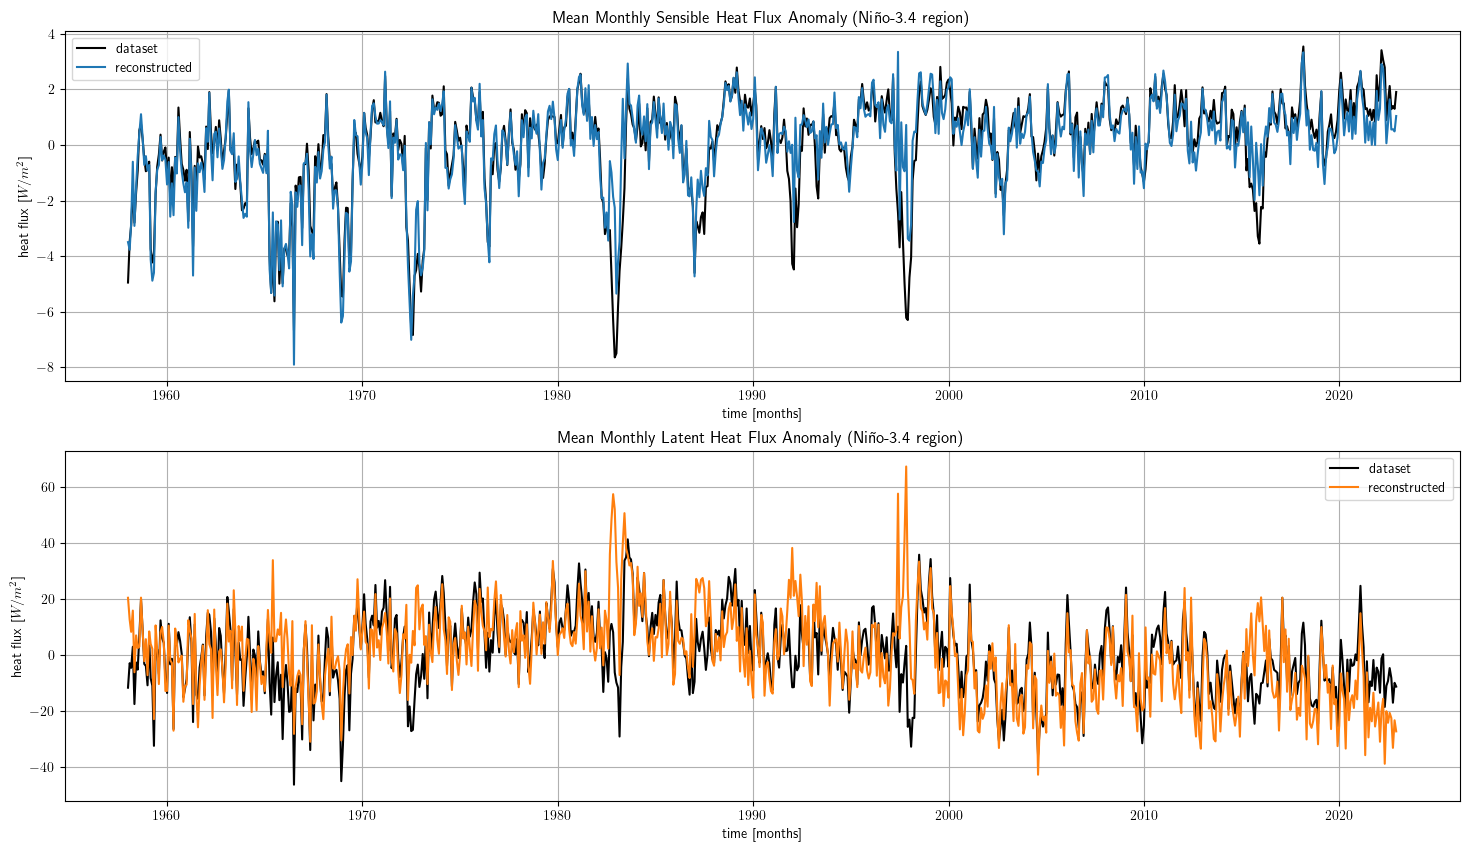

In [ ]:
list_flux_a = [sshf_a, slhf_a]
list_flux_rec_a = [Qs_a, Ql_a]

list_title = ["Mean Monthly Sensible Heat Flux Anomaly (Niño-3.4 region)","Mean Monthly Latent Heat Flux Anomaly (Niño-3.4 region)"]
list_colors = ['#1f77b4', '#ff7f0e']

fig, ax = plt.subplots(figsize=(18,10), nrows=2, ncols=1)

for i in range(2):

  ax[i].plot(sshf.time,list_flux_a[i], label = "dataset", color = 'k')
  ax[i].plot(sshf.time,list_flux_rec_a[i], label = "reconstructed", color = list_colors[i])
  ax[i].grid()
  ax[i].set_xlabel('time [months]')
  ax[i].set_ylabel('heat flux [$W/m^2$]')
  ax[i].set_title(list_title[i])
  ax[i].legend()

In [ ]:
print("Correlation coefficients between dataset and reconstructed data for :")
cor_sa = np.corrcoef(sshf_a,Qs_a)[1,0]
print("- sensible heat flux anomaly : " ,cor_sa)
cor_la = np.corrcoef(slhf_a,Ql_a)[1,0]
print("- latent heat flux anomaly : ", cor_la)

Correlation coefficients between dataset and reconstructed data for :
- sensible heat flux anomaly :  0.9058554944833472
- latent heat flux anomaly :  0.7299037862741808


In [ ]:
#cor_l-cor_la

In the case of the sensible heat flux, the correlation coefficient is almost equal just slightly lower, telling us that the strong correlation isn't just due to the seasonal cycle. In the case of radiative heating, a greater difference would probably have been observed since it more directly depends on the sun. This is in agreement with the plot of the anomaly which shows that the shape of the anomalies continue to agree.

For the latent heat flux, the correlation coefficient is slightly lower and we also see this by the shape of both anomily timeseries which don't quite so often agree anymore. Nevertheless since they do agree to some extent and the correlation coefficient is still quite high we could conclude that this suggests that our reconstruction is robust with respect to the seasonal cycle. But maybe a change in correlation of about 0.1 is actually more important than what I am assuming, in which case we should conclude that the seasonal cycle does have an impact on the reconstructed latent heat flux.  

## 4. Winter vs Summer in the Tropics

In [ ]:
def config_map(ax):
  data_crs =  ccrs.PlateCarree()
  xticks=np.arange(0, 360, 60)
  yticks=np.arange(-35, 36, 20)
  ax.coastlines(resolution='auto', color='k') # coastlines
  ax.grid(which='both', linestyle=':')
  ax.set_xticks(xticks, crs=data_crs)
  ax.set_yticks(yticks, crs=data_crs)
  ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())
  ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())

In [ ]:
def seasonal_clm(xarr):
  xarr_clm = xarr.groupby('time.season').mean('time')
  return xarr_clm

In [ ]:
# climatology
Qs_c = seasonal_clm(Qs.sel(lat=slice(-35,35)))
Ql_c = seasonal_clm(Ql.sel(lat=slice(-35,35)))
sshf_c = seasonal_clm(dshlx.sshf/24/3600*sea_mask.sel(lat=slice(-35,35))) #W/m2 in a day
slhf_c = seasonal_clm(dshlx.slhf/24/3600*sea_mask.sel(lat=slice(-35,35))) #W/m2 in a day

#Qs_c.sel(season='JJA').plot()

In [ ]:
# to choose levels
#plt.hist(slhf_c.sel(season='JJA').values, bins=100)
#plt.hist(slhf_c.sel(season='DJF').values, bins=100)

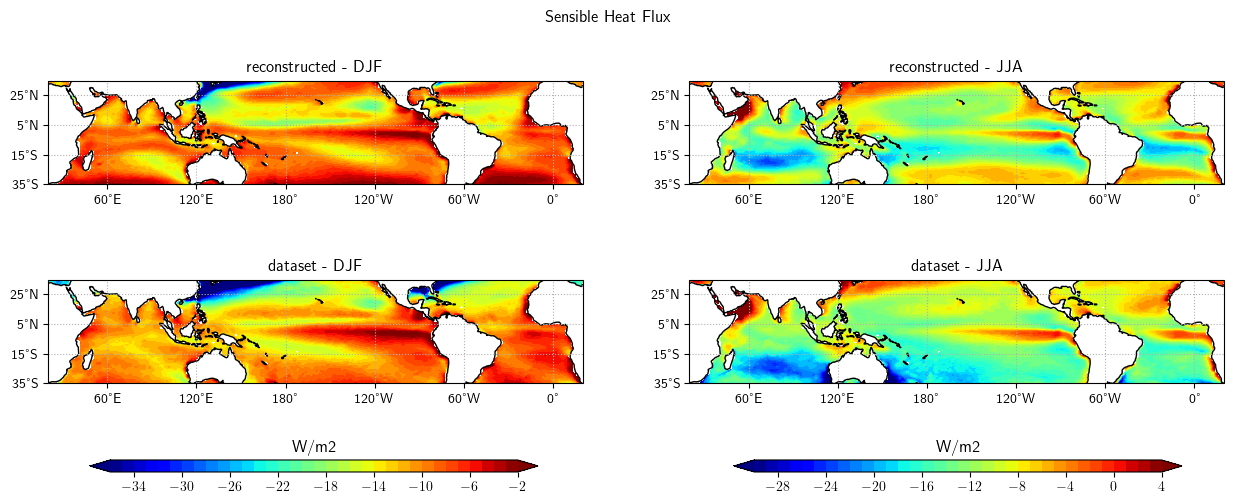

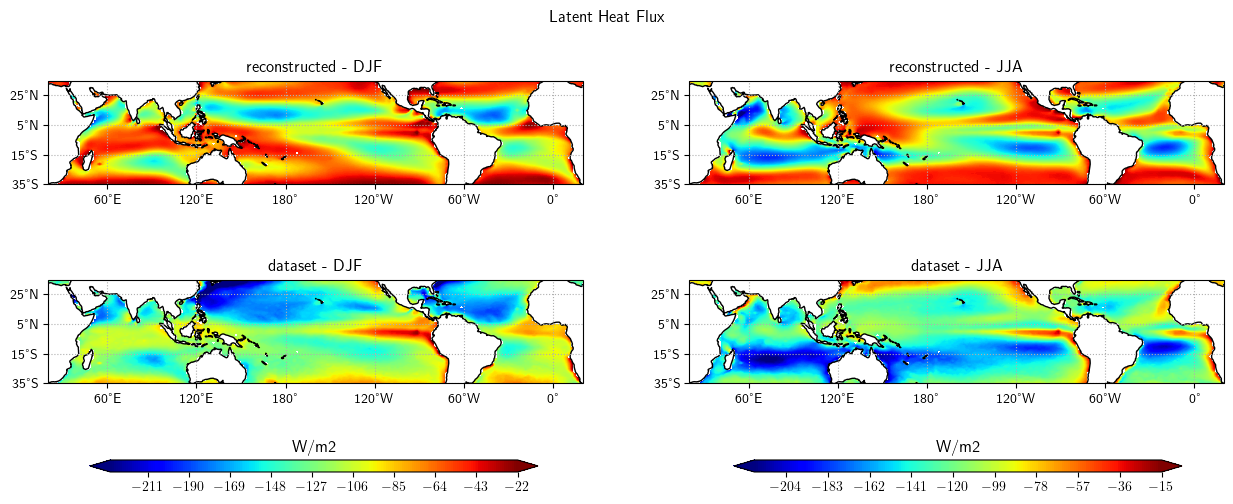

In [ ]:
vivaldi = ["DJF","JJA"]
list_flux_c = [Qs_c, sshf_c, Ql_c, slhf_c]
data_crs =  ccrs.PlateCarree()
# Levels
# lev_Qs_djf = np.arange(min(sshf_c.sel(season='DJF').min(),Qs_c.sel(season='DJF').min()),max(sshf_c.sel(season='DJF').max(),Qs_c.sel(season='DJF').max()))
# lev_Qs_jja = np.arange(min(sshf_c.sel(season='JJA').min(),Qs_c.sel(season='JJA').min()),max(sshf_c.sel(season='JJA').max(),Qs_c.sel(season='JJA').max()))
# lev_Ql_djf = np.arange(min(slhf_c.sel(season='DJF').min(),Ql_c.sel(season='DJF').min()),max(slhf_c.sel(season='DJF').max(),Ql_c.sel(season='DJF').max()))
# lev_Ql_jja = np.arange(min(slhf_c.sel(season='JJA').min(),Ql_c.sel(season='JJA').min()),max(slhf_c.sel(season='JJA').max(),Ql_c.sel(season='JJA').max()))

lev_Qs_djf = np.arange(-36,-1)
lev_Qs_jja = np.arange(-30,5)
lev_Ql_djf = np.arange(-230,-21)
lev_Ql_jja = np.arange(-220,-14)

#lev = [np.arange(-36,5),np.arange(-36,5),np.arange(-230,-14),np.arange(-230,-14)] # different levels for Qs and Ql, but for each : same over season and type (reconstructed or not)
levels = [lev_Qs_djf, lev_Qs_jja, lev_Ql_djf, lev_Ql_jja] #different levels also for seasons

list_titles = ["Sensible Heat Flux", "Latent Heat Flux"]
list_type = ["reconstructed", "dataset"]


for k in range(2): # loop over Qs or Ql
  fig = plt.figure(figsize = (14,6))
  gs = fig.add_gridspec(2,2, hspace=0.01, left=0.1, bottom=0.28, right=0.94, top=0.94)
  for j in range(2): # loop over JJA or DJF
    for i in range(2): # loop over original or reconstructed
      flux_c = list_flux_c[i+2*k].sel(season = vivaldi[j])
      flux_c, lons = add_cyclic_point(flux_c, coord=flux_c.lon)
      ax = fig.add_subplot(gs[i,j], projection=ccrs.PlateCarree(central_longitude=200))
      cc = ax.contourf(lons, Qs_c.lat, flux_c, transform =data_crs, levels = levels[j+2*k], cmap = 'jet', extend = 'both')
      config_map(ax)
      ax.set_title(list_type[i] + ' - ' + vivaldi[j])


    # Add a colorbar axis at the bottom of the graph
    cbar_ax = fig.add_axes([0.13*(1-j)+(1-0.32-0.09)*j, 0.21, 0.32, 0.02])   # dimensions [left, bottom, width, height] of the new axes
    cbar=fig.colorbar(cc, cax=cbar_ax, orientation='horizontal', shrink = 0.8)
    cbar.ax.set_title('W/m2')

  # titles
  fig.suptitle(list_titles[k])

Heat flux climatology is plotted here for two seasons.

We can say that the sensible heat flux reconstruction is qualititavely very similar to the dataset one, and is so for both seasons.

Latent heat flux reconstruction is a little less accurate. The cooling in the north west pacific near the corean coast and in the north west Atlantic near the east northamerican coast does not appear in the reconstruction. This could be because in the reconstruction of the latent heat flux we only took into account evaporation which is the main latent heat exchange type in the tropics where the general features are well conserved. However, towards the poles, melting of sea-ice should also be taken into account for the latent heat flux, which we have not done explaining that this feature only appears in the dataset latent heat flux.


# PART B: Reconstruct SST from surface heat fluxes

## 1. SST from surface heat fluxes assuming fix mixed layer depth

SST anomaly reconstruction and time averaged maps for different mixed layer depths

$\frac{dSST}{dt} = \frac{1}{\rho c_s h} \frac{dQ}{dt}$ $\rightarrow$ $dSST = \frac{1}{\rho c_s h}dQ$ $\rightarrow$ $\Delta SST = \frac{1}{\rho c_s h}\Delta Q$ $\rightarrow$ $SST(t) = \frac{1}{\rho c_s h}(Q(t)-Q(t_0)) + SST(t_0)$

In [ ]:
 # dataset sst and sst anomaly in tropical latitudes
sst35 = Ts.sel(lat=slice(-35,35))-273.15 # convert to °C
sst35_a = anom(sst35)
lats = sst35_a.lat
#plt.hist(sst35_a.mean(dim='time').values, bins=100)

In [ ]:
# constants
mixed_layer_depths = [20,200,50,500,100] # h [m]
rho = 1025 # sea water density at surface [kg/m3]
cs = 3850 # sea water specific heat [J/kg/C]

# Net Heat Fluxes
NHF35 = (dshlx.slhf + dshlx.sshf + dshlx["str"] + dshlx.ssr).sel(lat=slice(-35,35)) # [J/m2]

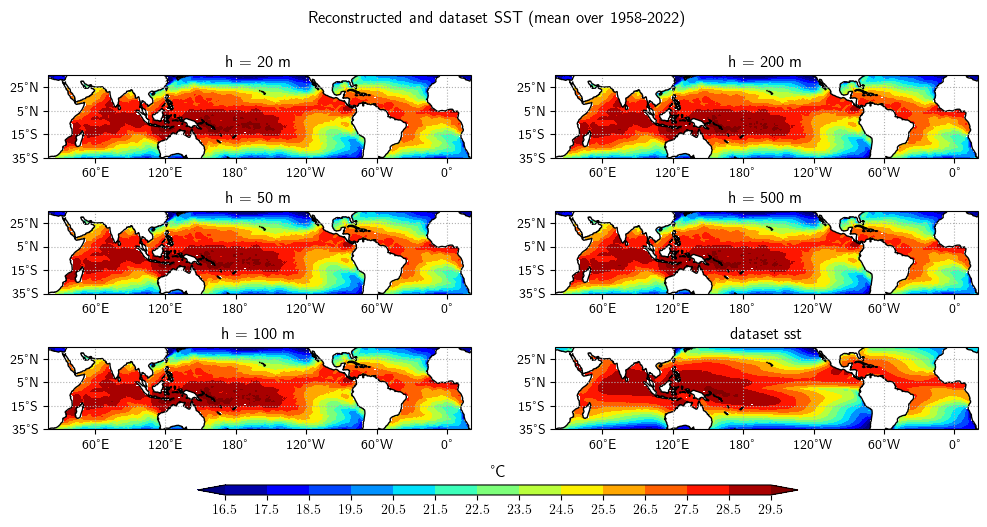

In [ ]:
# temperature levels in Celcius
levels = np.arange(16.5,30.5) # for sst_rec # np.arange(-3,3,0.1) for sst_rec_a-sst_a #np.arange(-5,5.1,0.5) for sst_rec-sst

cmap =  'jet' #'RdBu'

# FIGURES
fig, axs = plt.subplots(nrows = 3, ncols = 2, subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200)}, figsize = (12,5))
axs = axs.flat

# reconstructed sst in tropical latitudes for 5 different mixed layer depths
for i in range(len(mixed_layer_depths)):
  h = mixed_layer_depths[i] # [m]
  cte = rho * cs * h # constant [kg/m3*J/kg/C*m = J/C/m2]
  sst_rec = 1/cte * (NHF35-NHF35.isel(time=0)) + sst35.isel(time=0) # reconstructed sea surface temperature [1/(J/m2/C)*(J/m2)=C]
  sst_rec_a = anom(sst_rec)
  #err_sst_space = (sst_rec_a.mean(dim='time')-sst35_a.mean(dim='time'))*1e6 # anomaly and time average of sst_rec

  sst_recs, lons = add_cyclic_point(sst_rec.mean(dim='time'), coord=sst_rec.lon)
  ax = axs[i]
  cc = ax.contourf(lons, lats, sst_recs, transform = data_crs, cmap=cmap, levels = levels, extend = 'both')
  config_map(ax)
  ax.set_title('h = ' + str(h) +' m')

fig.suptitle('Reconstructed and dataset SST (mean over 1958-2022)')
#fig.suptitle('Difference between reconstructed and dataset Sea Surface Temperature Anomaly (sst_rec_a-sst_a)')

# bottom is the actual sst in tropical latitudes
sst_35s, lons = add_cyclic_point(sst35.mean(dim='time'), coord=sst35.lon)
ax = axs[5]
ax.contourf(lons, lats, sst_35s, transform = data_crs, cmap = cmap, levels = levels, extend = 'both')
config_map(ax)
ax.set_title('dataset sst')


# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.01, 0.5, 0.02])   # dimensions [left, bottom, width, height] of the new axes
cbar=fig.colorbar(cc, cax=cbar_ax, orientation='horizontal', shrink = 0.8)
cbar.ax.set_title('°C')  #(1e-6)
cbar.set_ticks(levels)


Text(0.5, 1.0, '°C (1e-6)')

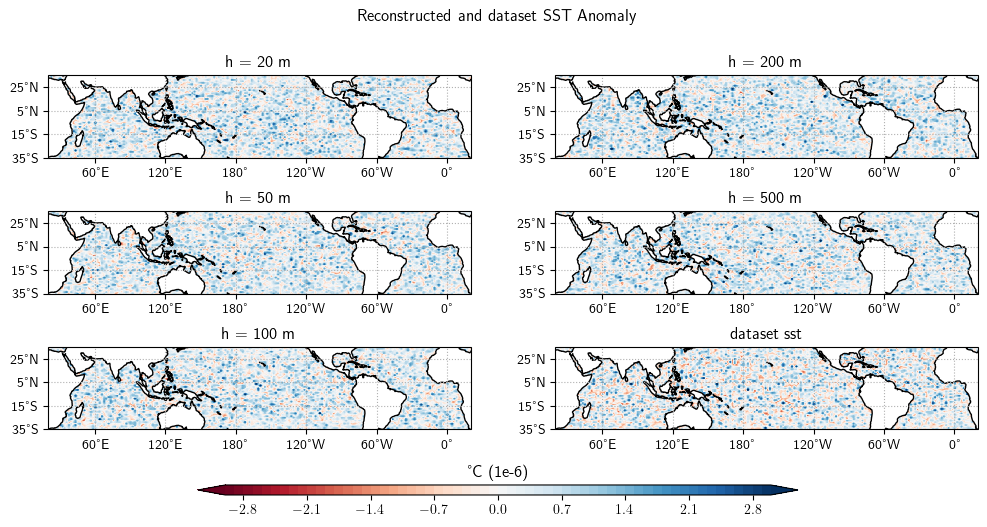

In [ ]:
# temperature levels in Celcius
levels = np.arange(-3,3.1,0.1) #for sst_rec_a-sst_a #np.arange(-5,5.1,0.5) for sst_rec-sst #np.arange(16.5,30.5) for sst_rec
cmap = 'RdBu' #'viridis' #'jet'

# FIGURES
fig, axs = plt.subplots(nrows = 3, ncols = 2, subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200)}, figsize = (12,5))
axs = axs.flat

# reconstructed sst anomaly in tropical latitudes for 5 different mixed layer depths
for i in range(5):
  h = mixed_layer_depths[i] # [m]
  cte = rho * cs * h # constant [kg/m3*J/kg/C*m = J/C/m2]
  sst_rec = 1/cte * (NHF35-NHF35.isel(time=0)) + sst35.isel(time=0) # reconstructed sea surface temperature [1/(J/m2/C)*(J/m2)=C]
  sst_rec_a = anom(sst_rec)
  sst_space = (sst_rec_a)*1e6 # anomaly and time average of sst_rec

  sst_recs, lons = add_cyclic_point(sst_space.mean(dim='time'), coord=sst_rec.lon)
  ax = axs[i]
  cc = ax.contourf(lons, lats, sst_recs, transform = data_crs, cmap=cmap, levels = levels, extend = 'both')
  config_map(ax)
  ax.set_title('h = ' + str(h) +' m')


fig.suptitle('Reconstructed and dataset SST Anomaly')

# bottom is the actual sst in tropical latitudes
sst_35s, lons = add_cyclic_point(sst35_a.mean(dim='time')*1e6, coord=sst35.lon)
ax = axs[5]
ax.contourf(lons, lats, sst_35s, transform = data_crs, cmap = cmap, levels = levels, extend = 'both')
config_map(ax)
ax.set_title('dataset sst')


# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.01, 0.5, 0.02])   # dimensions [left, bottom, width, height] of the new axes
cbar=fig.colorbar(cc, cax=cbar_ax, orientation='horizontal', shrink = 0.8)
cbar.ax.set_title('°C (1e-6)')
#cbar.set_ticks(levels)


Which value gives the best reconstruction ?

It is not very clear which value gives the best reconstruction from the sst and sst anomaly plots, but since mixed layer depth is about 50-100m deep depending on the season, I would expect either h = 50 m or h = 100 m to give the best reconstruction.

Numerical Integration version of sst reconstruction (looks the same as one step approximation)

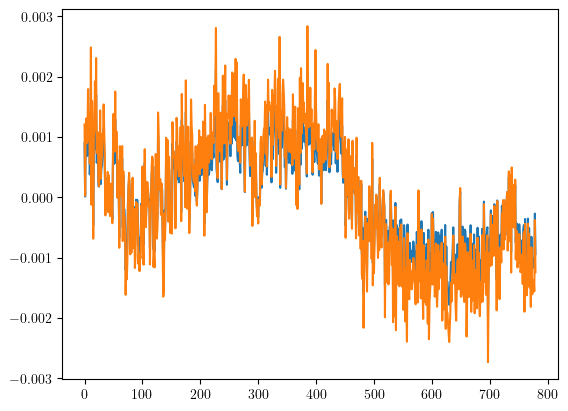

In [ ]:
# Numerical integration version of sst timeseries reconstruction using time step of a day
sst0 = sst35.isel(time=0)
sst_int = np.zeros(780)
sst_int[0] = sst0.mean(dim=('lon','lat'))
for i in range(780-1):
  sst_int[i+1] = sst_int[i] + 1/cte * (NHF35.isel(time=i+1)-NHF35.isel(time=i)).mean(dim=('lon','lat'))

sst_int = xr.DataArray(data = sst_int, coords=dict(time=sst35.time), dims=["time"])
sst_int_a = anom(sst_int)

plt.plot(sst_int_a)
plt.plot(sst_rec_a.mean(dim=('lon','lat')))

Coupling between reconstructed and dataset sst

In [ ]:
def npcoupling2d(FLD1, FLD2): #Code hint for pointwise correlation
  if np.array_equal(FLD1.shape, FLD2.shape):
    T, M, N = FLD1.shape
    coupling2d = np.empty((M, N))
    coupling2d[:] = np.nan
    Atz = np.reshape(FLD1, (T, M * N))
    Btz = np.reshape(FLD2, (T, M * N))
    Astd = np.std(Atz, 0)
    Bstd = np.std(Btz, 0)
    AtzZ = np.einsum('ji,i->ji', Atz, 1 / Astd)
    AtzZM = (AtzZ - AtzZ.mean(axis=0))
    BtzZ = np.einsum('ji,i->ji', Btz, 1 / Bstd)
    BtzZM = (BtzZ - BtzZ.mean(axis=0))
    Rtz = np.einsum('ij,ij->j', AtzZM, BtzZM) / T
    coupling2d = np.reshape(Rtz, (M, N))
  else:
    print('The arrays must have the same shape')
  return coupling2d

Text(0.5, 0.98, 'Pointwise Correlation between SST anomaly fields (reconstructed and dataset)')

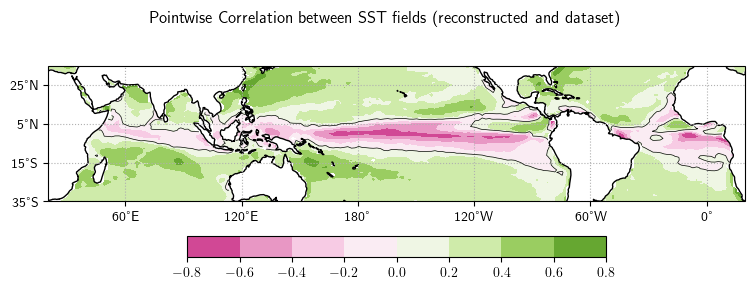

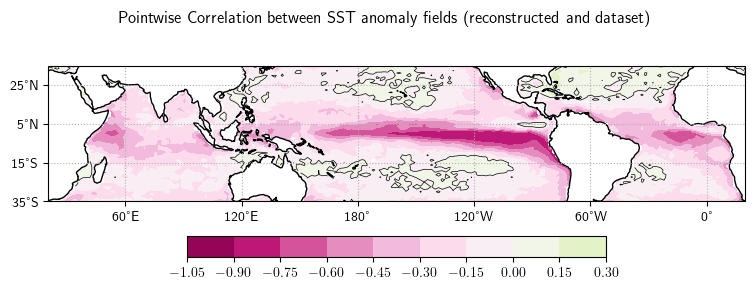

In [ ]:
# fig 1
fig, ax = plt.subplots(nrows=1,ncols=1,subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200)},figsize=(9,3))

corr = npcoupling2d(sst35.values, sst_rec.values)  #sst_rec is the last one ie h=100m
corr, lons = add_cyclic_point(corr, coord=sst35_a.lon)
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
cc = ax.contourf(lons, sst35_a.lat, corr,cmap ='PiYG',transform = data_crs, norm = norm)
ax.contour(lons, sst35_a.lat, corr, transform = data_crs, levels = [0], colors = 'k', linewidths = 0.5)
config_map(ax)

fig.colorbar(cc, orientation='horizontal', shrink = 0.6)
fig.suptitle('Pointwise Correlation between SST fields (reconstructed and dataset)')


# fig 2
fig, ax = plt.subplots(nrows=1,ncols=1,subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200)},figsize=(9,3))

corr = npcoupling2d(sst35_a.values, anom(sst_rec).values)  #sst_rec is the last one ie h=100m
corr, lons = add_cyclic_point(corr, coord=sst35_a.lon)
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
cc = ax.contourf(lons, sst35_a.lat, corr,cmap ='PiYG',transform = data_crs, norm = norm)
ax.contour(lons, sst35_a.lat, corr, transform = data_crs, levels = [0], colors = 'k', linewidths = 0.5)
config_map(ax)

fig.colorbar(cc, orientation='horizontal', shrink = 0.6)
fig.suptitle('Pointwise Correlation between SST anomaly fields (reconstructed and dataset)')

How could one improve this simple model? Which important processes are missing?

In theory we could improve the model using a non constant mixed layer depth since mixed layer depth changes both in time (with seasons) and space (in mid ocean or along coasts). In practice as the plots in the next part show using the dataset mixed layer doesn't actually change much and the coupling in the tropics is quite bad in any case. The negative correlation even suggests that as the ocean cools in the dataset, it warms in the reconstruction and viceversa, this is coherent with the timeseries plots (in the next section).

Surface wind stress is missing from this model. Thus all the heat advected by ocean currents generated by surface wind does not actually get transported in the reconstructed dataset. During normal conditions in the Pacific ocean, the trade winds in the convective cell have a great impact on the transport of heat from east to west, which is noticeable in the dataset sst climatology, however in the reconstructed sst climatology plots, we see that sst stays quite high further east in the Pacific.

Not taking into account surface wind stress also means that El Nino is ignored. In the time series plots below we see that during El Nino years, dataset sst is higher than average but in both reconstructions El Nino years don't show and sst values even are lower than average, this is coherent with the negative correlation around the equator seen in the above correlation plots.

## 2. SST from surface heat fluxes with variable mixed layer depth

In [ ]:
h = dso.so20chgt.sel(lat=slice(-35,35))
h_a = anom(h)

In [ ]:
c2 = 1/(h*rho*cs)
c2= np.asarray(c2)
c2[c2>1e-7] = 1e-7 # make infinity finite
dNHF35 = (NHF35-NHF35.isel(time=0))
dNHF35= np.asarray(dNHF35)
sst_rec2 = np.multiply(c2,dNHF35)  + np.asarray(sst35.isel(time=0))  # reconstructed sea surface temperature [(m3/kg)*(kgC/J)*(1/m)*(J/m2)=C]

sst_rec2 = xr.DataArray(data = sst_rec2, coords=dict(time=sst35.time), dims=["time","lat","lon"])

sst_rec2_ave = sst_rec2.mean(dim='time') #time average

#plt.pcolor(sst_rec2_ave)

Text(0.5, 1.0, '°C')

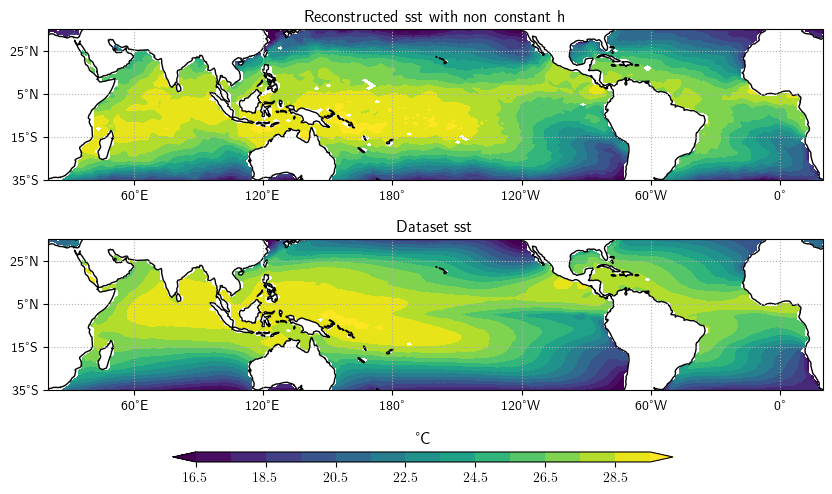

In [ ]:
# temperature levels in Celcius
levels = np.arange(16.5,30.5) # np.arange(-3,3,0.1) #np.arange(16.5,30.5)

cmap = 'viridis' #'RdBu'

# FIGURES
fig, axs = plt.subplots(nrows = 2, ncols = 1, subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200)}, figsize = (10,5))
axs = axs.flat


sst_space, lons = add_cyclic_point(sst_rec2_ave, coord=sst_rec.lon)
ax = axs[0]
ax.contourf(lons, lats, sst_space, transform = data_crs, cmap=cmap, levels = levels, extend = 'both')
config_map(ax)
ax.set_title('Reconstructed sst with non constant h')

# bottom left is the actual sst in tropical latitudes
sst_35s, lons = add_cyclic_point(sst35.mean(dim='time'), coord=sst35.lon)
ax = axs[1]
cc = ax.contourf(lons, lats, sst_35s, transform = data_crs, cmap = cmap, levels = levels, extend = 'both')
config_map(ax)
ax.set_title('Dataset sst')


# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, -0.01, 0.5, 0.02])   # dimensions [left, bottom, width, height] of the new axes
cbar=fig.colorbar(cc, cax=cbar_ax, orientation='horizontal', shrink = 0.8)
cbar.ax.set_title('°C')#, x = 1.05, y = 0.03)
#cbar.set_ticks(levels)


Text(0.5, 0.98, 'Pointwise Correlation between SST anomaly fields (reconstructed and dataset), \n non constant mixed layer h.')

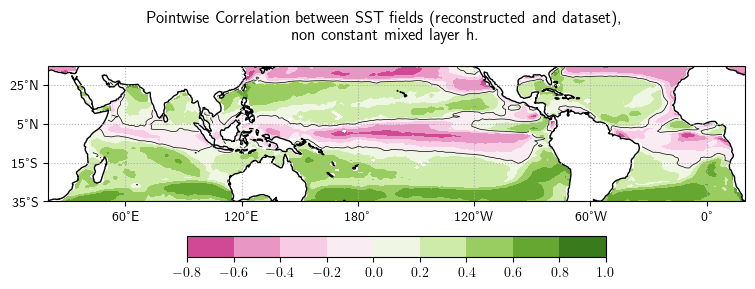

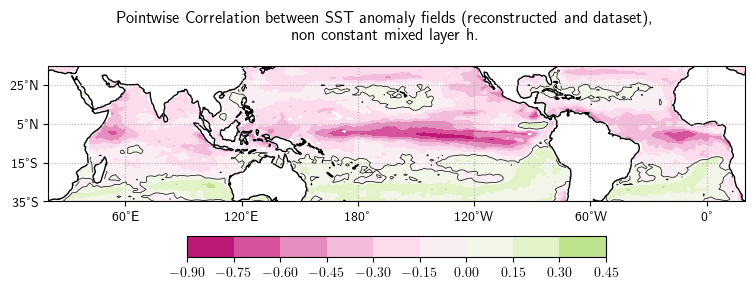

In [ ]:
# fig 1
fig, ax = plt.subplots(nrows=1,ncols=1,subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200)},figsize=(9,3))

corr = npcoupling2d(sst35.values, sst_rec2.values)  #sst_rec is the last one ie h=100m
corr, lons = add_cyclic_point(corr, coord=sst35_a.lon)
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
cc = ax.contourf(lons, sst35_a.lat, corr,cmap ='PiYG',transform = data_crs, norm = norm)
ax.contour(lons, sst35_a.lat, corr, transform = data_crs, levels = [0], colors = 'k', linewidths = 0.5)
config_map(ax)

fig.colorbar(cc, orientation='horizontal', shrink = 0.6)
fig.suptitle('Pointwise Correlation between SST fields (reconstructed and dataset), \n non constant mixed layer h.')


# fig 2
fig, ax = plt.subplots(nrows=1,ncols=1,subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200)},figsize=(9,3))

corr = npcoupling2d(sst35_a.values, anom(sst_rec2).values)  #sst_rec is the last one ie h=100m
corr, lons = add_cyclic_point(corr, coord=sst35_a.lon)
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
cc = ax.contourf(lons, sst35_a.lat, corr,cmap ='PiYG',transform = data_crs, norm = norm)
ax.contour(lons, sst35_a.lat, corr, transform = data_crs, levels = [0], colors = 'k', linewidths = 0.5)
config_map(ax)

fig.colorbar(cc, orientation='horizontal', shrink = 0.6)
fig.suptitle('Pointwise Correlation between SST anomaly fields (reconstructed and dataset), \n non constant mixed layer h.')

Text(0.5, 0.98, 'Timeseries for SST anomaly in tropical latitudes')

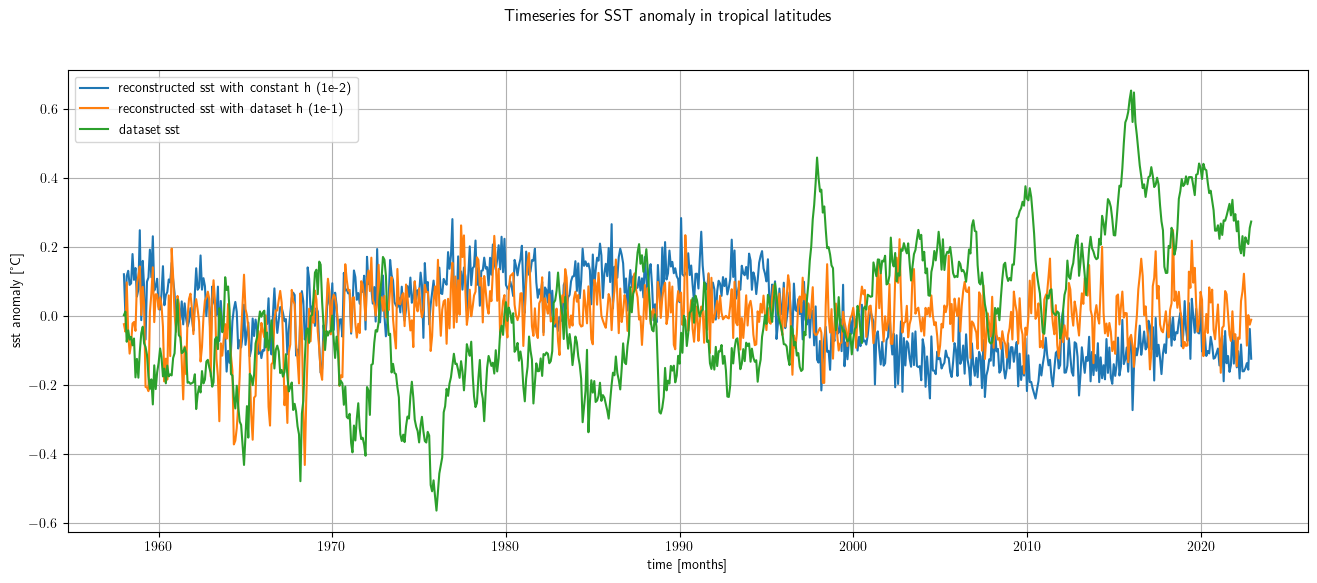

In [ ]:
# Time series
list_sst = [1e2*sst_rec_a.mean(dim=('lon','lat')), 1e1*anom(sst_rec2).mean(dim=('lon','lat')), sst35_a.mean(dim=('lon','lat'))]
list_label = ["reconstructed sst with constant h (1e-2)","reconstructed sst with dataset h (1e-1)","dataset sst"]

fig, ax = plt.subplots(figsize=(16,6), nrows=1, ncols=1)

for i in range(len(list_sst)):
  ax.plot(sst35.time,list_sst[i], label = list_label[i])
  ax.grid()
  ax.set_xlabel('time [months]')
  ax.set_ylabel('sst anomaly [°C]')
  ax.legend()
fig.suptitle('Timeseries for SST anomaly in tropical latitudes')

## OPTIONAL

In [ ]:
h_nino = dso.so20chgt.sel(lat=slice(-5,5)).sel(lon=slice(-170,-120))
h_nino_tsa = anom(h_nino.mean(dim=('lon','lat')))
sst_nino = dsERA5.sst.sel(lat=slice(-5,5)).sel(lon=slice(-170,-120))
sst_nino_tsa = anom(sst_nino.mean(dim=('lon','lat')))

Text(0.5, 0.98, 'SST Anomaly in Niño-3.4 region')

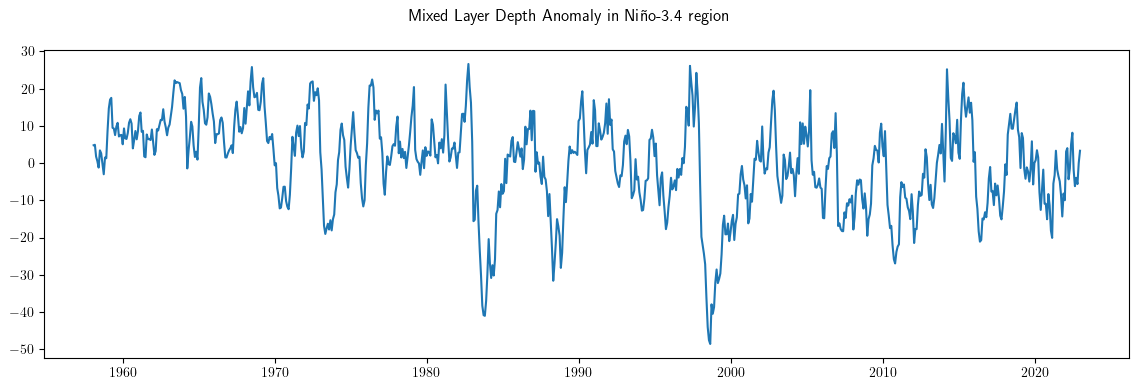

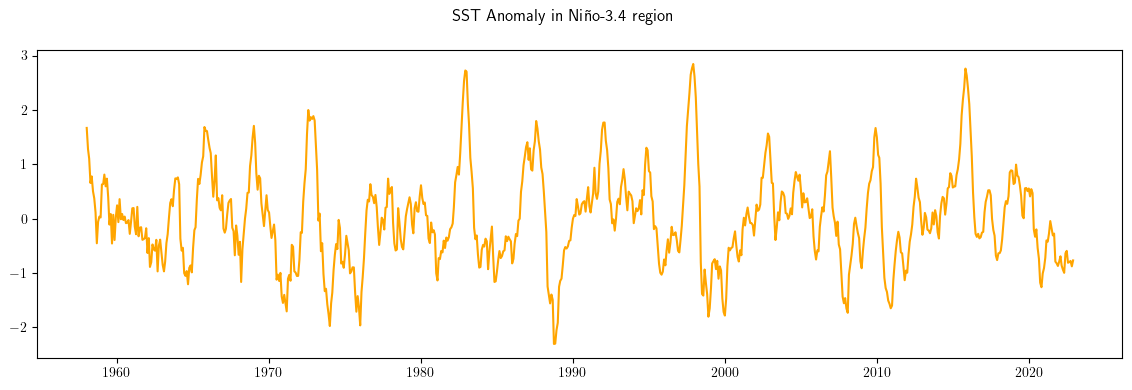

In [ ]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(h_nino_tsa.time,h_nino_tsa)   #.isel(time=slice(680,706)) corresponds to 2015-2016 ENSO
fig.suptitle('Mixed Layer Depth Anomaly in Niño-3.4 region')

fig, ax = plt.subplots(figsize=(14,4))
ax.plot(sst_nino_tsa.time,sst_nino_tsa,color='orange')
fig.suptitle('SST Anomaly in Niño-3.4 region')

Text(0.5, 1.0, '$\\rho (sst_a,h_a)$')

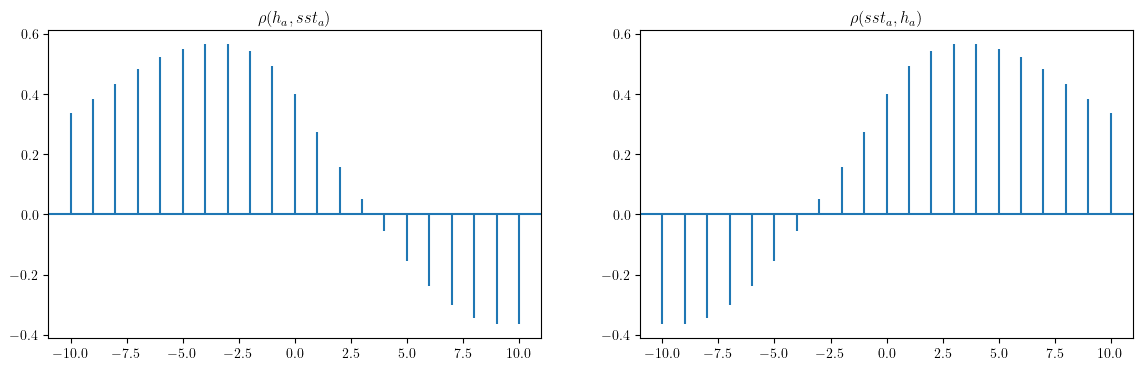

In [ ]:
fig, axs = plt.subplots(ncols = 2, figsize=(14,4))
axs[0].xcorr(h_nino_tsa.values,sst_nino_tsa.values)
axs[0].set_title(r'$\rho (h_a,sst_a)$')
axs[1].xcorr(sst_nino_tsa,h_nino_tsa,10)
axs[1].set_title(r'$\rho (sst_a,h_a)$')

These plots of the cross correlation between mixed layer depth (h) anomaly and sst anomaly both in the Nino3.4 region show that h leads sst by about 3 to 6 months.


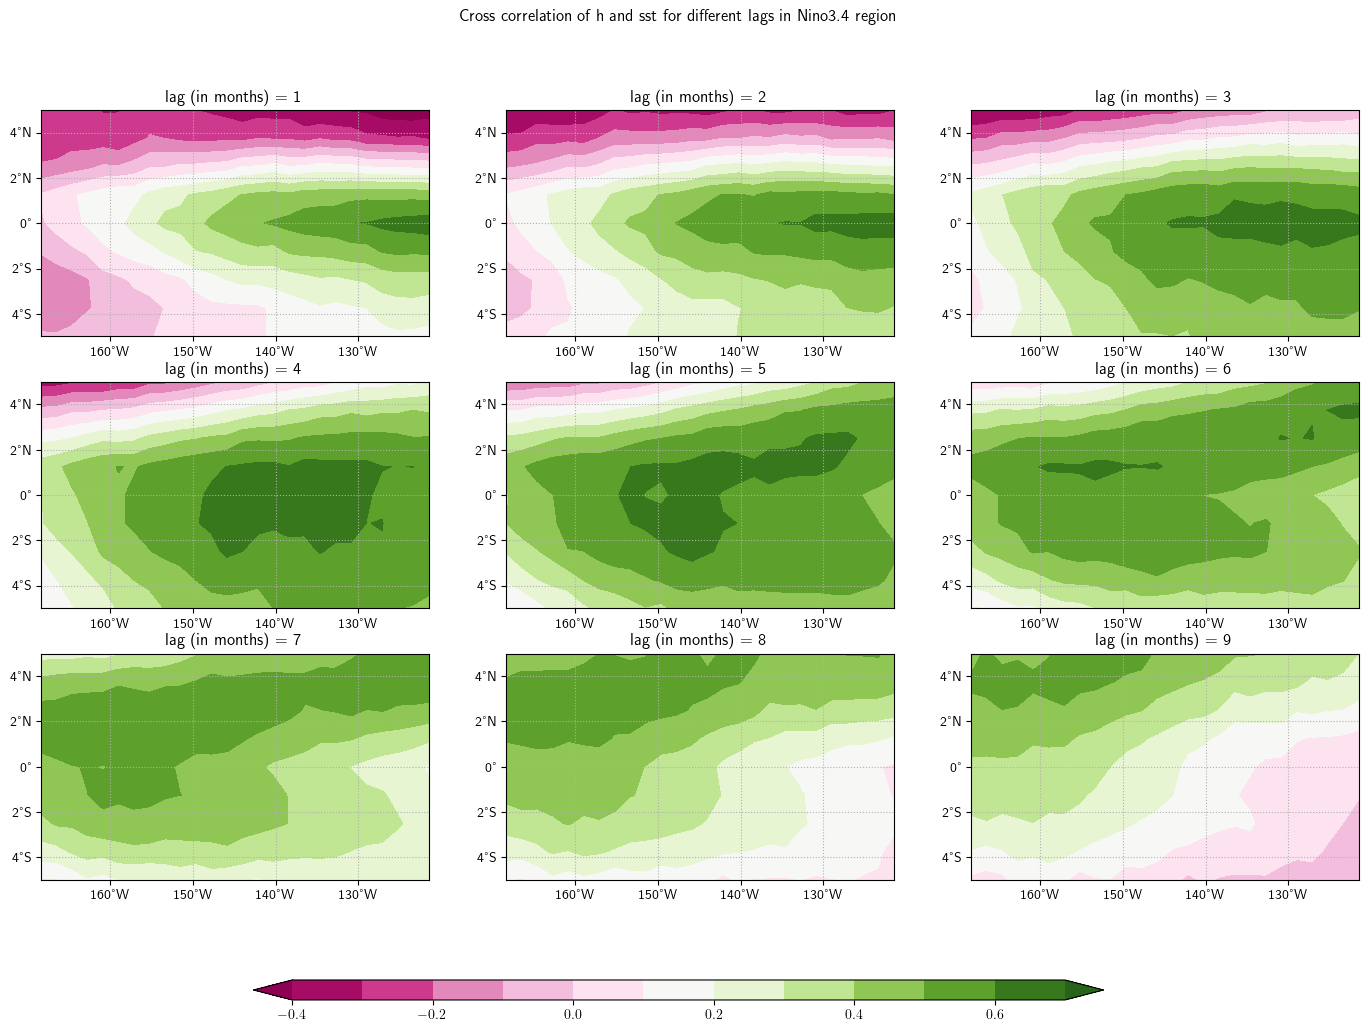

In [ ]:
lags = np.arange(1,10,1)
levels = np.arange(-0.4,0.71,0.1)

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(17,10))
axs = axs.flat
for i in range(len(lags)):
  ax = axs[i]
  lag = lags[i]
  cc = ax.contourf(h_nino.lon,h_nino.lat,npcoupling2d(h_nino.isel(time=slice(0,780-lag)).values, sst_nino.isel(time=slice(lag,780)).values),cmap ='PiYG',levels=levels, extend='both')
  ax.set_title('lag (in months) = ' + str(lag))
  ax.grid(which='both', linestyle=':')
  ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())
  ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())

fig.suptitle('Cross correlation of h and sst for different lags in Nino3.4 region')

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, -0.01, 0.5, 0.02])   # dimensions [left, bottom, width, height] of the new axes
cbar=fig.colorbar(cc, cax=cbar_ax, orientation='horizontal', shrink = 0.8)